[09/24/25 20:09:09] INFO     Loading data from diabetes_raw (CSVDataset)...                    ]8;id=276498;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=749266;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardio_raw (CSVDataset)...                      ]8;id=694525;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=696081;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardiabetes_raw (CSVDataset)...                 ]8;id=115081;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=252755;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


=== diabetes_raw ===  shape=(8000, 14)


,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Registro
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Edad,8000.0,NaN,NaN,NaN,47.256375,11.438641,21.0,39.0,47.0,55.0,87.0
Cuartil_Edad,8000,4,Q1,2094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,8000,2,Hombre,4382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Diabetes,8000,4,Tipo 2,3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMC,8000.0,NaN,NaN,NaN,28.4856,6.056403,17.0,23.4,27.9,33.5,47.4
HbA1c,8000.0,NaN,NaN,NaN,6.80475,1.396565,4.5,5.47,6.84,7.89,11.37
Insulina,8000.0,NaN,NaN,NaN,75.761916,55.962552,0.0,29.0375,60.315,120.4075,250.0
Colesterol_Total,8000.0,NaN,NaN,NaN,221.42947,13.846739,180.0,211.29,220.89,231.05,270.0
LDL,8000.0,NaN,NaN,NaN,119.634956,11.698814,85.0,111.18,119.265,128.07,155.0
HDL,8000.0,NaN,NaN,NaN,50.162893,7.889843,35.0,44.92,50.06,55.37,68.0


Nulos por columna (top 10):
Edad                0
Cuartil_Edad        0
Sexo                0
Tipo_Diabetes       0
IMC                 0
HbA1c               0
Insulina            0
Colesterol_Total    0
LDL                 0
HDL                 0
dtype: int64
Duplicados exactos: 0


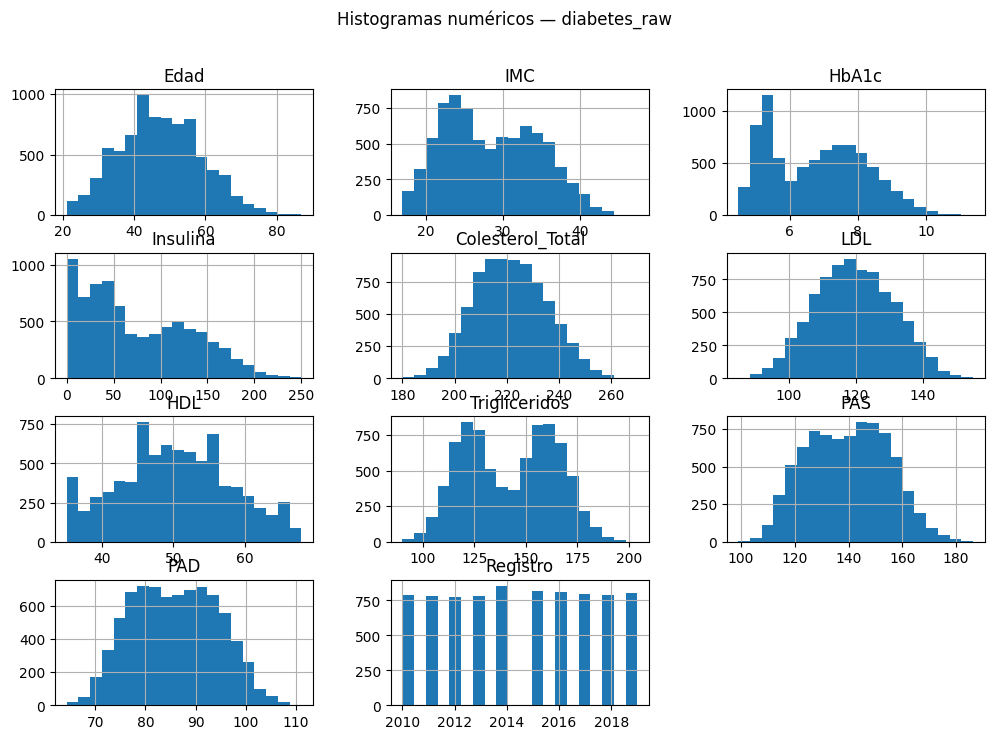


Distribución de 'Tipo_Diabetes':
 Tipo_Diabetes
Tipo 2         3977
No diabetes    2517
Tipo 1         1309
Gestacional     197
Name: count, dtype: int64

Proporciones:
 Tipo_Diabetes
Tipo 2         49.71%
No diabetes    31.46%
Tipo 1         16.36%
Gestacional     2.46%
Name: proportion, dtype: object


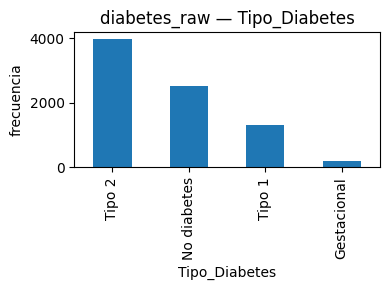


=== cardio_raw ===  shape=(8000, 16)


,Año_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Tramo_Edad,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD
0,2016,53,Hombre,Cataluña,Bajo,Moderado,45-54,24665.24,Alto,No consume,30.464413,0,203.053597,228.381680,146.4,89.7
1,2013,66,Mujer,Cataluña,Bajo,Sedentario,65+,21693.89,Moderado,No consume,21.307639,0,214.198250,246.749168,151.8,87.2
2,2017,68,Mujer,País Vasco,Bajo,Moderado,65+,15841.83,Moderado,No consume,32.672495,0,178.338545,214.823232,157.4,88.1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Año_Registro,8000.0,NaN,NaN,NaN,2014.500875,2.879199,2010.0,2012.0,2015.0,2017.0,2019.0
Edad,8000.0,NaN,NaN,NaN,58.638,7.008662,35.0,54.0,59.0,64.0,74.0
Sexo,8000,2,Mujer,4029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comunidad_Autonoma,8000,19,Andalucía,1373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Riesgo_Cardiovascular,8000,4,Bajo,3689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actividad_Fisica,8000,4,Sedentario,3650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tramo_Edad,8000,4,55-64,4094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ingresos_Anuales,8000.0,NaN,NaN,NaN,20696.984445,8818.316867,4333.67,14242.84,19054.335,25383.095,76878.41
Nivel_Estres,8000,3,Alto,4236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumo_Alcohol,8000,4,Bajo,3360,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nulos por columna (top 10):
Año_Registro             0
Edad                     0
Sexo                     0
Comunidad_Autonoma       0
Riesgo_Cardiovascular    0
Actividad_Fisica         0
Tramo_Edad               0
Ingresos_Anuales         0
Nivel_Estres             0
Consumo_Alcohol          0
dtype: int64
Duplicados exactos: 0


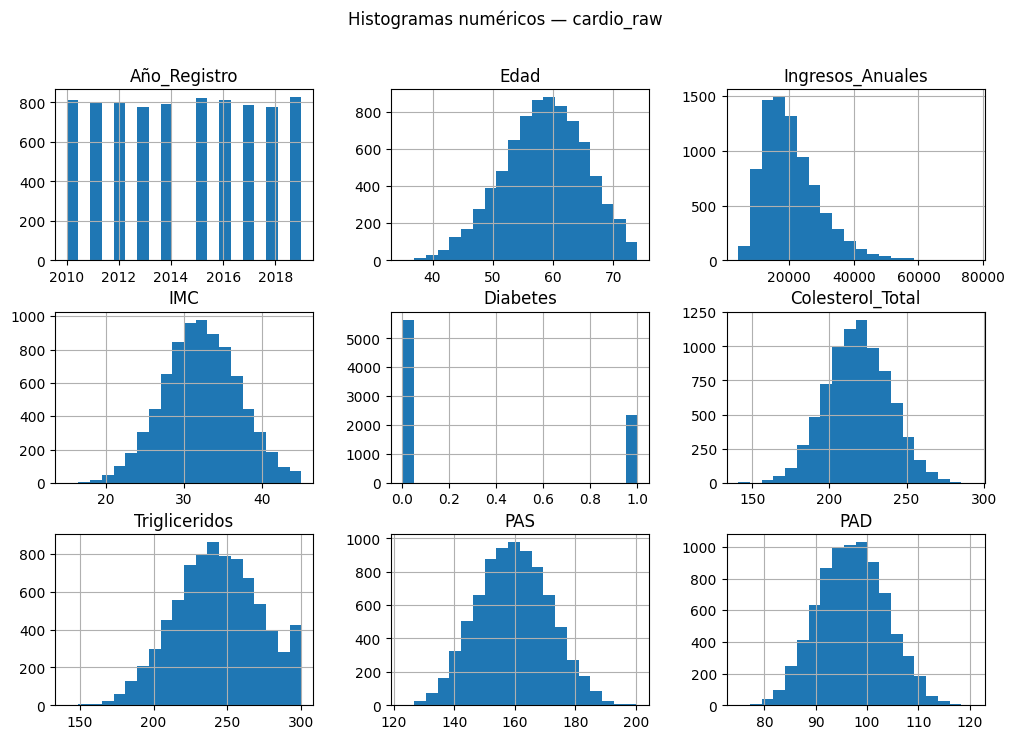


Distribución de 'Riesgo_Cardiovascular':
 Riesgo_Cardiovascular
Bajo        3689
Alto        2044
Moderado    1415
Muy Alto     852
Name: count, dtype: int64

Proporciones:
 Riesgo_Cardiovascular
Bajo        46.11%
Alto        25.55%
Moderado    17.69%
Muy Alto    10.65%
Name: proportion, dtype: object


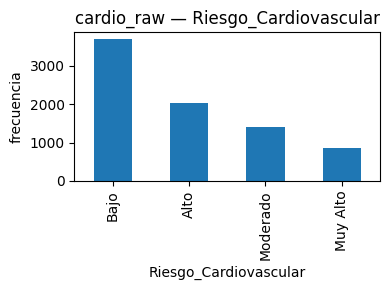


=== cardiabetes_raw ===  shape=(15949, 18)


,Año_Registro,Edad,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD,Cohorte,HbA1c,Insulina,LDL,HDL,Nivel_Estres,Actividad_Fisica,Riesgo_Cardiovascular,Sexo,Tipo_Diabetes
0,2016,53.0,30.464413,0,203.053597,228.381680,146.4,89.7,cardio,5.483777,10.602855,111.284292,71.456754,Alto,Moderado,Bajo,Hombre,No diabetes
1,2013,66.0,21.307639,0,214.198250,246.749168,151.8,87.2,cardio,5.212008,56.952216,124.064267,48.292897,Moderado,Sedentario,Bajo,Mujer,No diabetes
2,2017,68.0,32.672495,0,178.338545,214.823232,157.4,88.1,cardio,6.750564,92.875636,123.757918,55.659980,Moderado,Moderado,Bajo,Mujer,Diabetes latente


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Año_Registro,15949.0,NaN,NaN,NaN,2014.508684,2.867333,2010.0,2012.0,2015.0,2017.0,2019.0
Edad,15949.0,NaN,NaN,NaN,52.921751,11.027107,21.0,46.0,54.0,61.0,81.0
IMC,15949.0,NaN,NaN,NaN,30.346443,5.757866,17.0,25.8,30.7,34.6,45.6
Diabetes,15949.0,NaN,NaN,NaN,0.490438,0.499924,0.0,0.0,0.0,1.0,1.0
Colesterol_Total,15949.0,NaN,NaN,NaN,219.928521,17.373652,140.916989,208.44,219.88,231.597555,293.177964
Trigliceridos,15949.0,NaN,NaN,NaN,192.850527,56.65868,90.0,143.39,182.41,243.137337,300.0
PAS,15949.0,NaN,NaN,NaN,149.655558,16.79099,99.0,138.4,151.3,161.6,194.6
PAD,15949.0,NaN,NaN,NaN,91.494865,9.45046,64.3,84.9,92.4,98.3,116.7
Cohorte,15949,2,diabetes,7987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HbA1c,15949.0,NaN,NaN,NaN,6.384646,1.493556,3.5,5.221616,6.241344,7.54,11.37


Nulos por columna (top 10):
Año_Registro        0
Edad                0
IMC                 0
Diabetes            0
Colesterol_Total    0
Trigliceridos       0
PAS                 0
PAD                 0
Cohorte             0
HbA1c               0
dtype: int64
Duplicados exactos: 0


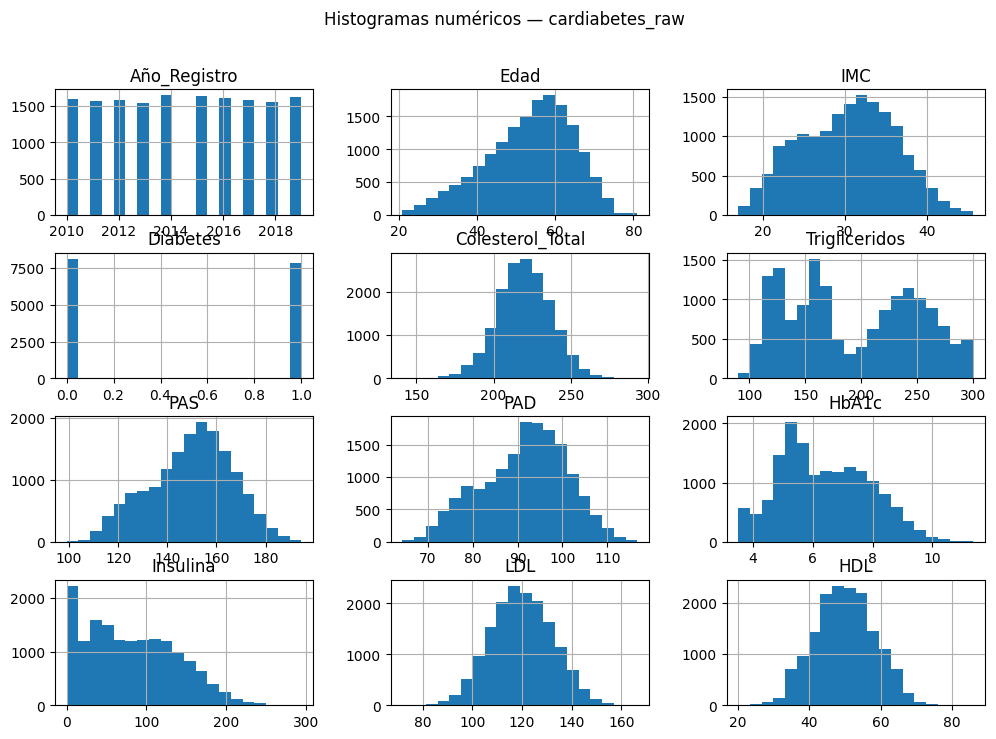


Distribución de 'Diabetes':
 Diabetes
0    8127
1    7822
Name: count, dtype: int64

Proporciones:
 Diabetes
0    50.96%
1    49.04%
Name: proportion, dtype: object


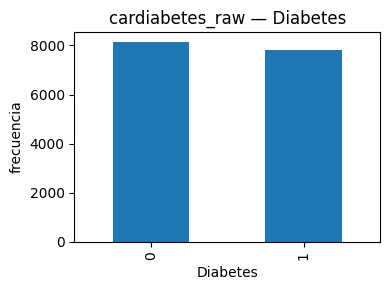

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def quick_eda(df: pd.DataFrame, name: str, target: str | None = None):
    print(f"\n=== {name} ===  shape={df.shape}")
    display(df.head(3))
    display(df.describe(include="all").T.iloc[:15])  # resumen rápido
    
    # Nulos y duplicados
    print("Nulos por columna (top 10):")
    print(df.isna().sum().sort_values(ascending=False).head(10))
    print("Duplicados exactos:", df.duplicated().sum())

    # Hist numéricas
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if num_cols:
        df[num_cols].hist(figsize=(12, 8), bins=20)
        plt.suptitle(f"Histogramas numéricos — {name}")
        plt.show()

    # Distribución del target (si existe)
    if target and target in df.columns:
        vc = df[target].value_counts(dropna=False)
        vcr = df[target].value_counts(normalize=True, dropna=False)
        print(f"\nDistribución de '{target}':\n", vc)
        print("\nProporciones:\n", (vcr*100).round(2).astype(str) + "%")
        ax = vc.plot(kind="bar", title=f"{name} — {target}", figsize=(4,3))
        ax.set_ylabel("frecuencia")
        plt.tight_layout(); plt.show()
    else:
        print("⚠️ Target no encontrado o no indicado.")

# Carga de RAW
dfs = {
    "diabetes_raw": catalog.load("diabetes_raw"),
    "cardio_raw": catalog.load("cardio_raw"),
    "cardiabetes_raw": catalog.load("cardiabetes_raw"),
}

# Targets desde parameters.yml (asegúrate que existan esas columnas)
tg = {
    "diabetes_raw": params["targets"]["diabetes"],
    "cardio_raw": params["targets"]["cardio"],
    "cardiabetes_raw": params["targets"]["cardiabetes"],
}

for name, df in dfs.items():
    quick_eda(df, name, target=tg.get(name))


In [2]:
import pandas as pd

def safe_load(name: str) -> pd.DataFrame:
    if catalog.exists(name):
        return catalog.load(name)
    print(f"[ADVERTENCIA] {name} no existe en el catálogo.")
    return pd.DataFrame()

df_diabetes = safe_load("diabetes_raw")
df_cardio = safe_load("cardio_raw")
df_cardiabetes = safe_load("cardiabetes_raw")

df_diabetes.head(10)


[09/24/25 20:08:54] INFO     Loading data from diabetes_raw (CSVDataset)...                    ]8;id=589285;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=947604;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardio_raw (CSVDataset)...                      ]8;id=72519;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=332539;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardiabetes_raw (CSVDataset)...                 ]8;id=742851;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=196272;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Registro
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015
3,50,Q3,Mujer,Tipo 2,28.1,6.85,87.05,245.20,141.09,46.95,186.89,145.0,89.5,2015
4,35,Q1,Mujer,Tipo 2,32.9,6.55,155.21,229.99,131.17,43.23,166.42,135.2,83.5,2011
5,35,Q1,Hombre,No diabetes,21.3,5.38,36.53,212.02,107.11,59.80,115.82,112.3,70.1,2018
6,29,Q1,Hombre,No diabetes,27.5,5.18,36.33,192.80,111.98,61.71,118.42,123.7,71.8,2010
7,60,Q4,Mujer,Tipo 2,36.1,8.42,135.63,239.49,115.02,45.72,153.81,160.7,99.0,2014
8,50,Q3,Hombre,Tipo 2,35.5,6.11,78.54,241.45,118.57,35.00,154.94,153.3,99.1,2014
9,54,Q3,Hombre,Tipo 2,36.7,6.90,118.71,229.36,136.85,39.64,159.64,146.8,93.2,2010


In [ ]:
import numpy as np
from IPython.display import display

for name, df in [("diabetes_raw", df_diabetes), ("cardio_raw", df_cardio), ("cardiabetes_raw", df_cardiabetes)]:
    print(f"\n=== {name} ===")
    print(df.shape, "filas x columnas")
    display(df.head(5))
    print("Duplicados:", int(df.duplicated().sum()), "| Nulos totales:", int(df.isna().sum().sum()))
    display(df.isna().sum().sort_values(ascending=False).head(10).to_frame("nulos_top10"))
    binarias = [c for c in df.columns if df[c].dropna().nunique()==2]
    print("Candidatas binarias:", binarias[:12])



=== diabetes_raw ===
(8000, 14) filas x columnas


,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Registro
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015
3,50,Q3,Mujer,Tipo 2,28.1,6.85,87.05,245.20,141.09,46.95,186.89,145.0,89.5,2015
4,35,Q1,Mujer,Tipo 2,32.9,6.55,155.21,229.99,131.17,43.23,166.42,135.2,83.5,2011


Duplicados: 0 | Nulos totales: 0


,nulos_top10
Edad,0
Cuartil_Edad,0
Sexo,0
Tipo_Diabetes,0
IMC,0
HbA1c,0
Insulina,0
Colesterol_Total,0
LDL,0
HDL,0


Candidatas binarias: ['Sexo']

=== cardio_raw ===
(8000, 16) filas x columnas


,Año_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Tramo_Edad,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD
0,2016,53,Hombre,Cataluña,Bajo,Moderado,45-54,24665.24,Alto,No consume,30.464413,0,203.053597,228.381680,146.4,89.7
1,2013,66,Mujer,Cataluña,Bajo,Sedentario,65+,21693.89,Moderado,No consume,21.307639,0,214.198250,246.749168,151.8,87.2
2,2017,68,Mujer,País Vasco,Bajo,Moderado,65+,15841.83,Moderado,No consume,32.672495,0,178.338545,214.823232,157.4,88.1
3,2014,60,Mujer,Aragón,Bajo,Sedentario,55-64,10548.19,Moderado,No consume,41.167111,0,208.059981,242.028543,175.5,95.1
4,2016,61,Mujer,Andalucía,Moderado,Sedentario,55-64,15698.34,Moderado,Bajo,31.813888,1,260.781259,243.954935,164.6,93.9


Duplicados: 0 | Nulos totales: 0


,nulos_top10
Año_Registro,0
Edad,0
Sexo,0
Comunidad_Autonoma,0
Riesgo_Cardiovascular,0
Actividad_Fisica,0
Tramo_Edad,0
Ingresos_Anuales,0
Nivel_Estres,0
Consumo_Alcohol,0


Candidatas binarias: ['Sexo', 'Diabetes']

=== cardiabetes_raw ===
(15949, 18) filas x columnas


,Año_Registro,Edad,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD,Cohorte,HbA1c,Insulina,LDL,HDL,Nivel_Estres,Actividad_Fisica,Riesgo_Cardiovascular,Sexo,Tipo_Diabetes
0,2016,53.0,30.464413,0,203.053597,228.381680,146.4,89.7,cardio,5.483777,10.602855,111.284292,71.456754,Alto,Moderado,Bajo,Hombre,No diabetes
1,2013,66.0,21.307639,0,214.198250,246.749168,151.8,87.2,cardio,5.212008,56.952216,124.064267,48.292897,Moderado,Sedentario,Bajo,Mujer,No diabetes
2,2017,68.0,32.672495,0,178.338545,214.823232,157.4,88.1,cardio,6.750564,92.875636,123.757918,55.659980,Moderado,Moderado,Bajo,Mujer,Diabetes latente
3,2014,60.0,41.167111,0,208.059981,242.028543,175.5,95.1,cardio,4.659614,188.637574,110.158158,54.487884,Moderado,Sedentario,Bajo,Mujer,Diabetes latente
4,2016,61.0,31.813888,1,260.781259,243.954935,164.6,93.9,cardio,7.436320,66.564019,120.410972,52.990636,Moderado,Sedentario,Riesgo Elevado,Mujer,Diabetes latente


Duplicados: 0 | Nulos totales: 0


,nulos_top10
Año_Registro,0
Edad,0
IMC,0
Diabetes,0
Colesterol_Total,0
Trigliceridos,0
PAS,0
PAD,0
Cohorte,0
HbA1c,0


Candidatas binarias: ['Diabetes', 'Cohorte', 'Riesgo_Cardiovascular', 'Sexo']


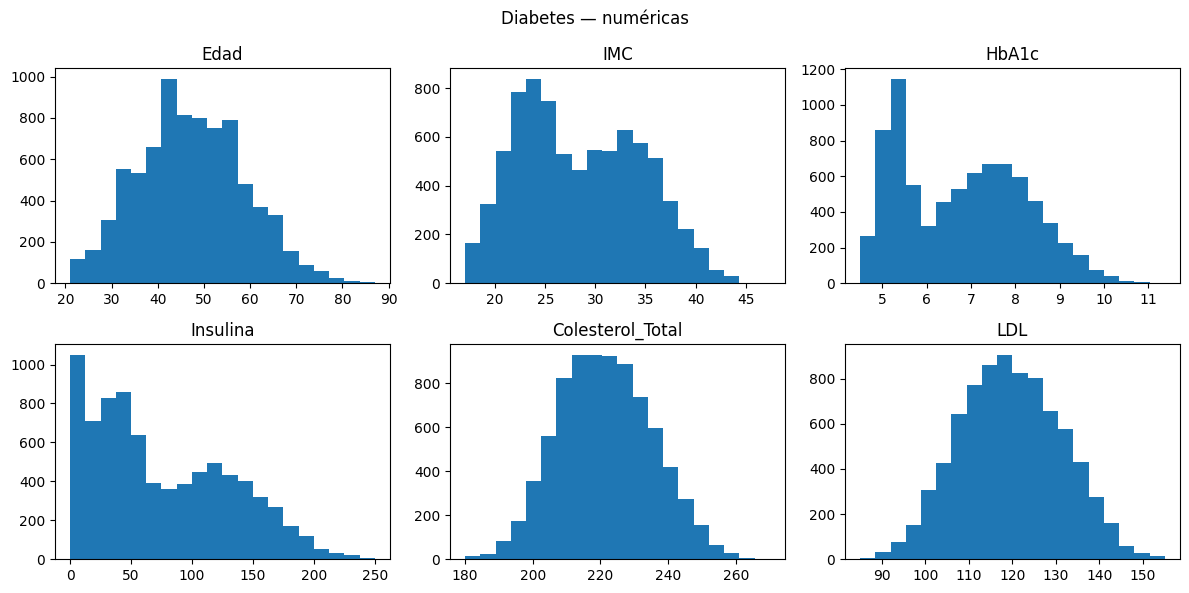

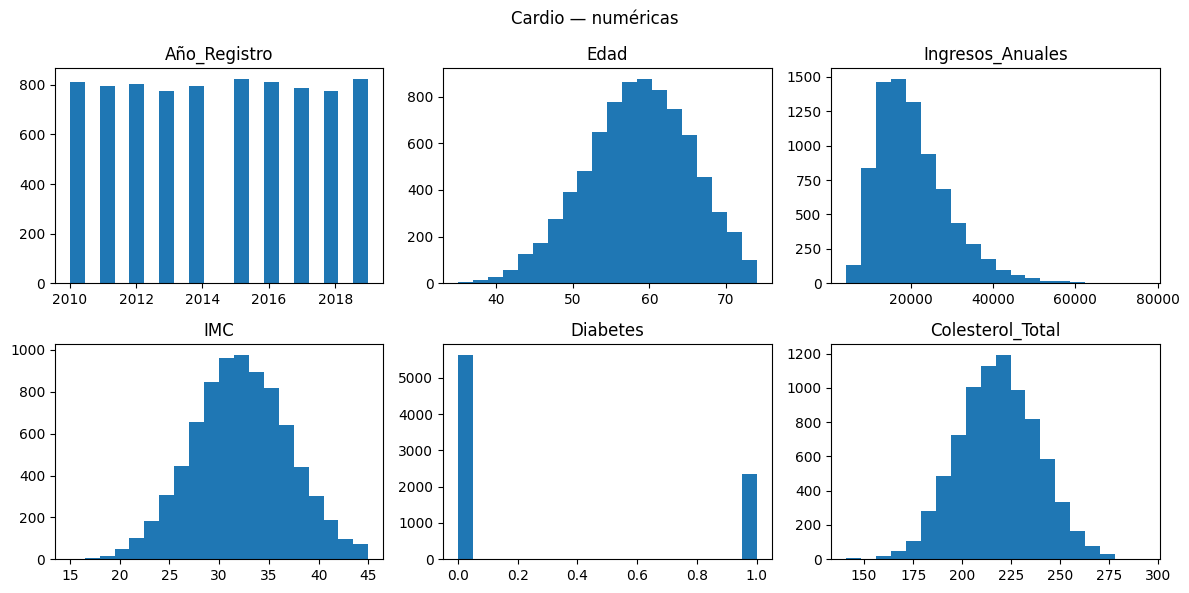

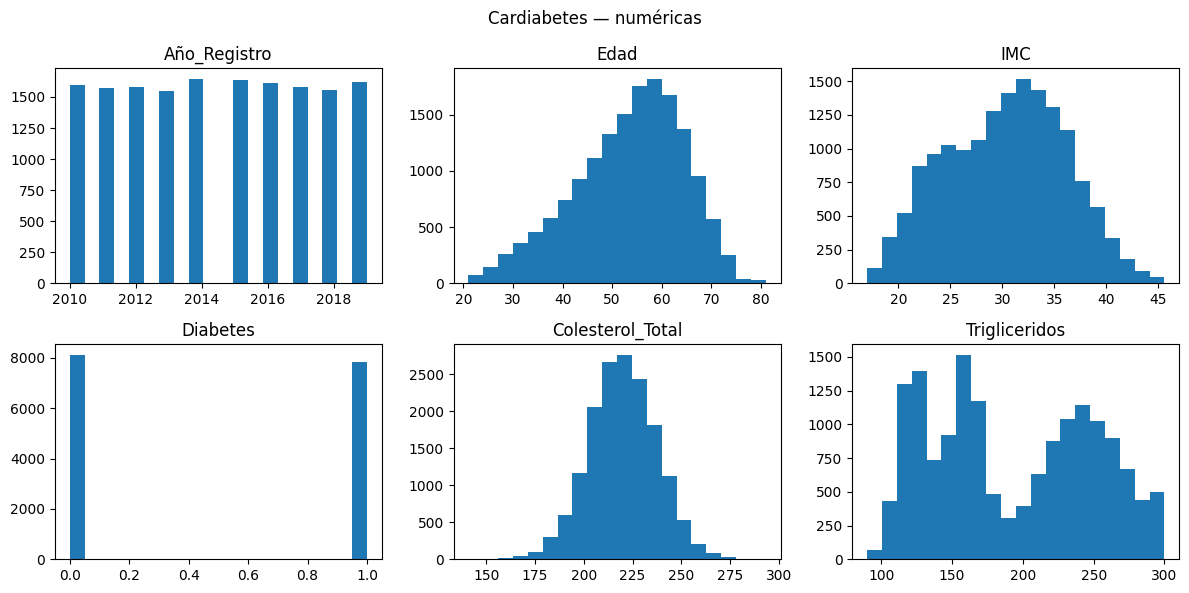

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def hist_grid(df, title, max_cols=6):
    num = df.select_dtypes(include=np.number).iloc[:, :max_cols]
    if num.empty:
        print(f"[{title}] No hay columnas numéricas."); return
    rows = (len(num.columns)+2)//3
    fig, axes = plt.subplots(rows, 3, figsize=(12, 3*rows))
    axes = axes.ravel()
    for i, c in enumerate(num.columns):
        axes[i].hist(num[c].dropna(), bins=20)
        axes[i].set_title(c)
    for j in range(i+1, len(axes)): axes[j].axis("off")
    fig.suptitle(title); fig.tight_layout(); plt.show()

hist_grid(df_diabetes, "Diabetes — numéricas")
hist_grid(df_cardio, "Cardio — numéricas")
hist_grid(df_cardiabetes, "Cardiabetes — numéricas")
